[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MauricioRR-Tec/Machine-Learning/blob/master/Notebooks/Module_2/SML_Examples.ipynb)

# Examples of Classification

### Visualizing the iris dataset

In [55]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:,:2] # we only take the first two features.
y = iris.target
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

In [56]:
plt.figure(2, figsize=(8, 6))
plt.clf()

<Figure size 576x432 with 0 Axes>

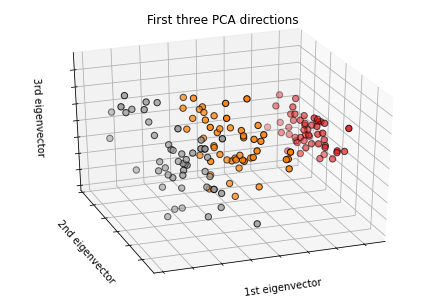

In [65]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max) 
plt.xticks(()) 
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y, cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])
plt.show()

In [58]:
# import the necessary packages

# ML Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split     #Split arrays or matrices into random train and test subsets
from sklearn.metrics import classification_report        #Build a text report showing the main classification metrics.
from sklearn.datasets import load_iris                   #Dataset
import argparse

## construct the argument parser and parse the arguments
#ap = argparse.ArgumentParser()
#ap.add_argument("-m", "--model", type=str, default="knn",
#	help="type of python machine learning model to use")
#args = vars(ap.parse_args())

# define the dictionary of models our script can use, where the key
# to the dictionary is the name of the model (supplied via command
# line argument) and the value is the model itself
models = {
	"knn": KNeighborsClassifier(n_neighbors=1),
	"naive_bayes": GaussianNB(),
	"logit": LogisticRegression(solver="lbfgs", multi_class="auto"),
	"svm": SVC(kernel="rbf", gamma="auto"),
	"decision_tree": DecisionTreeClassifier(),
	"random_forest": RandomForestClassifier(n_estimators=100),
	"mlp": MLPClassifier()
}

In [59]:
# load the Iris dataset and perform a training and testing split,
# using 75% of the data for training and 25% for evaluation
print("[INFO] loading data...")
dataset = load_iris()
(trainX, testX, trainY, testY) = train_test_split(dataset.data, dataset.target, random_state=3, test_size=0.25)

[INFO] loading data...


In [60]:
# train the model
print("[INFO] using '{}' model".format("knn"))
model = models["knn"]
model.fit(trainX, trainY)

[INFO] using 'knn' model


KNeighborsClassifier(n_neighbors=1)

In [61]:
# make predictions on our data and show a classification report
print("[INFO] evaluating...")
predictions = model.predict(testX)
print(classification_report(testY, predictions, target_names=dataset.target_names))

[INFO] evaluating...
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.92      0.92      0.92        12
   virginica       0.91      0.91      0.91        11

    accuracy                           0.95        38
   macro avg       0.94      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38



# "Basic" NN

In [66]:
!pip install keras
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD #Optimizadores que acompaña a los perceptrones (tecnicas matemáticas)
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import load_iris

ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`

In [2]:
# load the Iris dataset and perform a training and testing split,
# using 75% of the data for training and 25% for evaluation
print("[INFO] loading data...")
dataset = load_iris()
(trainX, testX, trainY, testY) = train_test_split(dataset.data, dataset.target, test_size=0.25)

[INFO] loading data...


In [14]:
# encode the labels as 1-hot vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [15]:
# define the 4-3-3-3 architecture using Keras
model = Sequential()
model.add(Dense(3, input_shape=(4,), activation="sigmoid"))
model.add(Dense(3, activation="sigmoid"))
model.add(Dense(3, activation="softmax"))

In [16]:
# train the model using SGD
print("[INFO] training network...")
opt = SGD(lr=0.1, momentum=0.9, decay=0.1 / 250)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=250, batch_size=16)

[INFO] training network...
Epoch 1/250
7/7 [==============================] - 0s 19ms/step - loss: 1.1108 - accuracy: 0.3393 - val_loss: 1.0894 - val_accuracy: 0.3158
Epoch 2/250
7/7 [==============================] - 0s 2ms/step - loss: 1.0892 - accuracy: 0.4375 - val_loss: 1.0886 - val_accuracy: 0.3158
Epoch 3/250
7/7 [==============================] - 0s 3ms/step - loss: 1.0639 - accuracy: 0.4554 - val_loss: 1.0334 - val_accuracy: 0.6842
Epoch 4/250
7/7 [==============================] - 0s 4ms/step - loss: 1.0376 - accuracy: 0.5000 - val_loss: 0.9968 - val_accuracy: 0.5000
Epoch 5/250
7/7 [==============================] - 0s 4ms/step - loss: 0.9854 - accuracy: 0.6339 - val_loss: 0.9370 - val_accuracy: 0.6316
Epoch 6/250
7/7 [==============================] - 0s 5ms/step - loss: 0.8945 - accuracy: 0.6429 - val_loss: 0.8340 - val_accuracy: 0.6842
Epoch 7/250
7/7 [==============================] - 0s 4ms/step - loss: 0.7842 - accuracy: 0.6607 - val_loss: 0.7405 - val_accuracy: 0.6316

In [17]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=16)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=dataset.target_names))

[INFO] evaluating network...
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.86      1.00      0.92        12
   virginica       1.00      0.86      0.92        14

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



# Another example of classification, but for images...

In [9]:
# import the necessary packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import argparse
import os

def extract_color_stats(image):
	# split the input image into its respective RGB color channels
	# and then create a feature vector with 6 values: the mean and
	# standard deviation for each of the 3 channels, respectively
	(R, G, B) = image.split()
	features = [np.mean(R), np.mean(G), np.mean(B), np.std(R),
		np.std(G), np.std(B)]

	# return our set of features
	return features

# construct the argument parser and parse the arguments
#ap = argparse.ArgumentParser()
#ap.add_argument("-d", "--dataset", type=str, default="3scenes",
#	help="path to directory containing the '3scenes' dataset")
#ap.add_argument("-m", "--model", type=str, default="knn",
#	help="type of python machine learning model to use")
#args = vars(ap.parse_args())

# define the dictionary of models our script can use, where the key
# to the dictionary is the name of the model (supplied via command
# line argument) and the value is the model itself
models = {
	"knn": KNeighborsClassifier(n_neighbors=1),
	"naive_bayes": GaussianNB(),
	"logit": LogisticRegression(solver="lbfgs", multi_class="auto"),
	"svm": SVC(kernel="linear"),
	"decision_tree": DecisionTreeClassifier(),
	"random_forest": RandomForestClassifier(n_estimators=100),
	"mlp": MLPClassifier()
}

# grab all image paths in the input dataset directory, initialize our
# list of extracted features and corresponding labels
print("[INFO] extracting image features...")
imagePaths = paths.list_images("3scenes/")
data = []
labels = []

# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, compute color channel
	# statistics, and then update our data list
	image = Image.open(imagePath)
	features = extract_color_stats(image)
	data.append(features)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

# encode the labels, converting them from strings to integers
le = LabelEncoder()
labels = le.fit_transform(labels)

# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25)

# train the model
print("[INFO] using '{}' model".format("knn"))
model = models["knn"]
model.fit(trainX, trainY)

# make predictions on our data and show a classification report
print("[INFO] evaluating...")
predictions = model.predict(testX)
print(classification_report(testY, predictions, target_names=le.classes_))

[INFO] extracting image features...
[INFO] using 'knn' model
[INFO] evaluating...
                 precision    recall  f1-score   support

  3scenes/coast       0.77      0.60      0.68        81
 3scenes/forest       0.76      0.82      0.79        79
3scenes/highway       0.70      0.81      0.75        77

       accuracy                           0.74       237
      macro avg       0.74      0.74      0.74       237
   weighted avg       0.75      0.74      0.74       237



# Example of CNN

In [10]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import argparse
import os


# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("3scenes/")
data = []
labels = []

# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 32x32 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
	image = np.array(image.resize((32, 32))) / 255.0
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),
	np.array(labels), test_size=0.25)

# define our Convolutional Neural Network architecture
model = Sequential()
model.add(Conv2D(8, (3, 3), padding="same", input_shape=(32, 32, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(16, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(3))
model.add(Activation("softmax"))

# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY),
	epochs=50, batch_size=32)

# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] loading images...
[INFO] training network...
Epoch 1/50
23/23 [==============================] - 0s 16ms/step - loss: 1.0182 - accuracy: 0.4965 - val_loss: 0.9694 - val_accuracy: 0.4388
Epoch 2/50
23/23 [==============================] - 0s 10ms/step - loss: 0.8895 - accuracy: 0.5823 - val_loss: 0.8588 - val_accuracy: 0.5992
Epoch 3/50
23/23 [==============================] - 0s 10ms/step - loss: 0.7558 - accuracy: 0.6948 - val_loss: 0.7301 - val_accuracy: 0.7426
Epoch 4/50
23/23 [==============================] - 0s 10ms/step - loss: 0.6632 - accuracy: 0.7468 - val_loss: 0.6626 - val_accuracy: 0.6962
Epoch 5/50
23/23 [==============================] - 0s 10ms/step - loss: 0.5880 - accuracy: 0.7722 - val_loss: 0.6015 - val_accuracy: 0.7806
Epoch 6/50
23/23 [==============================] - 0s 10ms/step - loss: 0.5514 - accuracy: 0.7961 - val_loss: 0.5151 - val_accuracy: 0.8228
Epoch 7/50
23/23 [==============================] - 0s 11ms/step - loss: 0.4795 - accuracy: 0.8284 - v